<img src="./pics/ajay-tech-logo.png"/> <hr>
This notebook is &copy; of Ajay Tech @ https://ajaytech.co. You can find the online version of this notebook at <a href="https://ajaytech.co/knn-python">KNN Classification in Python</a>

# Contents

- [What is Classification](#What-is-Classification)
- [How does KNN work](#How-does-KNN-work)
- [Math behind KNN](#Math-behind-KNN)
- [KNN by hand](#KNN-by-hand)
- [KNN in Python](#KNN-in-Python)
- [KNN for Regression](#KNN-for-Regression)
- [Feature Scaling](#Feature-Scaling)
- [Effect of Outliers](#Effect-of-Outliers)
- [Parameter Tuning](#Parameter-Tuning)
- [KNN Properties](#KNN-Properties)
  - [Non Parametric](#Non-Parametric)
  - [Lazy Learning](#Lazy-Learning)
  - [Bias Variance](#Bias-Variance)
- [Handle Categorical Values in KNN](#Handle-Categorical-Values-in-KNN)
- [KNN Assumptions](#KNN-Assumptions)



## What is Classification

Imagine a city like this. It has urban areas in the middle ( downtown, mid-town ) and sub-urban areas on the outskirts.



<img src="./pics/urban_sub-urban.png"/>

Each of the dwellings ( houses, businesses ) has a GPS location.

<img src="./pics/gps_location_knn.png"/>

Given the co-ordinates of a place, can you figure out if the place is urban or sub-urban ? What a stupid question you might be asking yourself. Why would you ever need to know it ? If a dwelling is urban or sub-urban is something you can know just by looking at it. We have taken this scenario just to make things simple. You can very well imagine more complicated scenarios like terrain mapping an alien planet or mapping friendly neighborhoods vs hostile in a war zone etc. In all these cases, visual clues might not be good enough.

As with any Machine Learning algorithm, we need data points to start with. We need a bunch of data points clearly marked as urban or sub-urban so that we can train the algorithm first.



<img src="./pics/data_points_sub-urban_urban.png"/>

We list the data points in a grid like so.



<img src="./pics/data_points.png"/>

Once we have the data, our task is to train the algorithm so that any arbitrary point can now be classified as either urban or rub-urban just based on the data location. This is an example of classification.



<img src="./pics/arbitrary_data_point_knn.png"/>

We can take a similar example, but instead of classifying the result as either urban or sub-urban, we could be predicting a value - say the value of a house or a piece of real estate.



<img src="./pics/regression_knn.png"/>

Point being, we can use KNN for both classification as well as regression. Enough said, let's check out how KNN works.



## How does KNN work

Let's go back to the same urban/sub-urban problem. What we have is a list of data points - specifically GPS co-ordinates ( latitude and longitude ).



<img src="./pics/latitude_longitude.png"/>

Each of these data points have been classified properly in the training data set. Now, given a new point ( GPS location ), what our algorithm has to do is to classify it as urban or sub-urban.



<img src="./pics/urban_or_sub_urban.png"/>

How does KNN do it ? It is based on calculating the distances to the closest points. These closes points are what KNN refers to as neighbors.



For example, if we calculate the distance between the new point and all other known locations ( training data ) and sort the distance in increasing order,



<img src="./pics/knn_sorted_by_distance.png"/>

We see that the top 4 closest points are green ( sub-urban ) and the 5th closest point is yellow ( urban ). So, since the majority of the top 5 closest points is sub-urban, in all probability the new data point is sub-urban as well. Let's check out the math behind the calculation of distances.



## Math behind KNN

Here is a simple formula ( Euclidean distance ) for calculating the distance between 2 points in a 2-D space.



<img src="./pics/euclidean_distance_between_points.png"/>

By definition, you can extend the same to 3-D space as shown below.



<img src="./pics/euclidean_distance_3-d-space-knn.png"/>

Euclidean is the most popular formula to measure distance between 2 points in n-dimensional space. However, there are other types of measurement as well.



<img src="./pics/distances_euclidean_manhattan_minowski_hamming.png"/>

Once the distances are calculated, all we have to do is to sort the distances in increasing order and take the first "k" points. That is where K-NN gets its name from - "k" nearest neighbors. If the majority of these "k" nearest points belong to a particular category, you classify the new data point as belonging to that particular category.



Text(0, 0.5, 'sepal width (cm)')

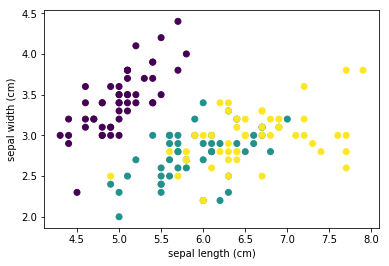

In [82]:
scatter = plt.scatter(iris.data[:,0], iris.data[:, 1], c=iris.target)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


## KNN by hand

Before we do KNN in Python, it is a good idea to try to do this distance calculation by hand in excel. Let's do it on the iris data set as it is a good example of a categorical response variable.



**Step 1** : Load the iris dataset from sklearn's datasets class



In [71]:
from sklearn import datasets

iris = datasets.load_iris()

# Just show the top 5 rows
print ( iris.data[:5,:] )

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Check the feature names

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

and the target data. 

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

What do these values mean ? The DESCR attribute should shows us all the necessary metadata. 

In [15]:
print ( iris.DESCR )

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Step 2** : Write out the iris file to excel



In [35]:
import numpy as np

# Prepare the target dataset by concatenating data and target
data = np.concatenate((iris.data,iris.target.reshape(-1,1)),axis=1)

# write out the data as a csv
np.savetxt("../data/iris.csv", data, 
                                  fmt="%1.2f",
                                  delimiter = ",", 
                                  header="Sepal Length,Sepal Width, Petal Length, Petal Width, Species")

You can find the excel used to calculate the distances by hand using simple formulas below.  

<a href="https://ajaytech.co/wp-content/uploads/2019/05/iris_calculation.xlsx"> <img src="./pics/excel_icon.png"/> </a>

<img src="./pics/iris-file.png"/>

<img src="./pics/excel_formula_to_calculate_knn_distances.png"/>

Once you do the ranking, all you have to do is pick the top 5 or 10 ( closest ) and the species that most of these top entries belong to is the one that the test entry should belong to.



## KNN in Python

In [36]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier


iris = datasets.load_iris()

model_knn = KNeighborsClassifier(n_neighbors=3).fit(iris.data,iris.target)

Pick the say the first row from the iris dataset, say and it should be of species "Setosa"

<img src="./pics/first_row.png"/>


Verify it by predicting using the KNN model. 

In [45]:
test = np.array([5.1,3.5,1.4,0.2]).reshape(-1,4)
model_knn.predict(test)

array([0])

Let's pick up another row , say the 52nd row. 

<img src="./pics/52-row.png"/>

This one should be a **Versicolor** species. 

In [49]:
# Say the first row from the iris dataset, say
test = np.array([7.0,3.2,4.7,1.4]).reshape(-1,4)
model_knn.predict(test)

array([1])

Looks accurate, right ? 

Let's split up the data into training and test datasets and check the accuracy of prediction. 

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

print ( "X_train size", X_train.shape)
print ( "X_test size", X_test.shape)
print ( "y_train size", y_train.shape)
print ( "y_train size", y_test.shape)

X_train size (120, 4)
X_test size (30, 4)
y_train size (120,)
y_train size (30,)


Let's now create the model with the training data. 

In [52]:
model_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

And let's predict the model with the test data. 

In [54]:
y_pred = model_knn.predict(X_test)

In Linear Regressin, we have seen how to check the accuracy of prediction using **r<sup>2</sup>**. That was for continous target variables. In the case of the iris dataset, the target is a categorical variable. So, **r<sup>2</sup>** does not apply here. A simple way to check the accuracy of a classification is via a confusion matrix. 

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ( cm )

[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]


To plot the confusion matrix, you would have to download the following code from sklearn. 

Confusion matrix, without normalization
[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.82 0.18]
 [0.   0.   1.  ]]


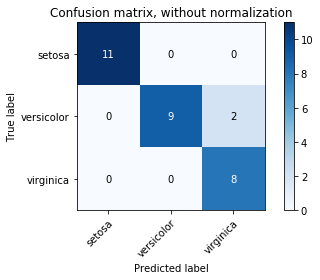

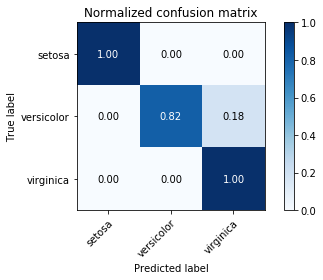

In [69]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, normalize    = False,
                      classes = iris.target_names , 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes= iris.target_names , normalize=True,
                      title='Normalized confusion matrix')

plt.show()

To get the _average_ accuracy across all the categories, use the **score** method of **KNeighborsClassifier** class.

In [56]:
model_knn.score(X_test,y_test)

0.9333333333333333

It is essentially an implementation of sklearn's **accuracy_score** that can be used for calculating average score of predicted vs real values of _categorical_ data. 

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9333333333333333

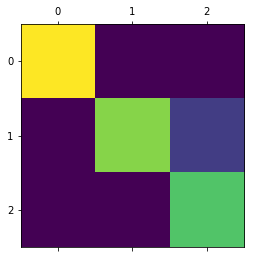

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(cm)